In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Veriyi yükle
data = pd.read_csv('numericData.csv')  # Dosya adını kendi dosyanıza göre değiştirin

In [3]:
X = data[['living_room', 'area', 'age', 'floor']].values  # Girdi özellikleri
y = data['price'].values  # Çıktı (fiyat)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),  # 4 giriş
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Tek çıkış (price), aktivasyon yok çünkü regresyon
])

c:\Users\fatih\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1288151296.0000 - mae: 31072.2070 - val_loss: 1352795136.0000 - val_mae: 31618.8574
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1331657728.0000 - mae: 31344.9609 - val_loss: 1213211136.0000 - val_mae: 29546.8750
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1081925376.0000 - mae: 27652.4023 - val_loss: 710832832.0000 - val_mae: 20501.0156
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 552352832.0000 - mae: 17383.7402 - val_loss: 307642560.0000 - val_mae: 11835.3701
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260263568.0000 - mae: 11364.9219 - val_loss: 266635088.0000 - val_mae: 11633.4619
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 243905296.0000 - mae: 11458.4873 - val_loss: 263492784.0000 - val_mae: 11669.0801
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 241043376.0000 - mae: 11457.5420 - val_loss: 262127328.0000 - val_mae: 11722

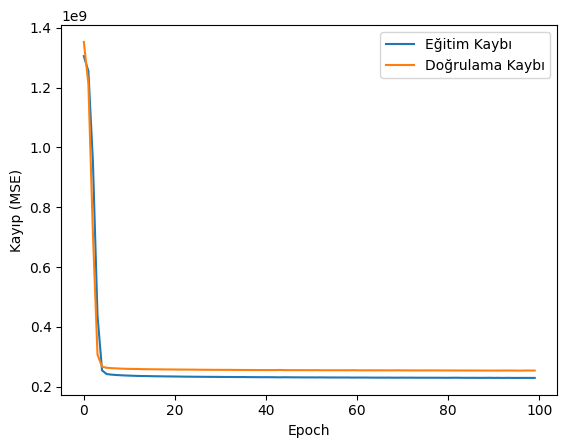

In [9]:
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (MSE)')
plt.legend()
plt.show()

Epoch 1/300


c:\Users\fatih\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0116 - mae: 0.7963 - val_loss: 0.9258 - val_mae: 0.7402
Epoch 2/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9524 - mae: 0.7647 - val_loss: 0.8621 - val_mae: 0.7182
Epoch 3/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8846 - mae: 0.7426 - val_loss: 0.8166 - val_mae: 0.7008
Epoch 4/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8665 - mae: 0.7340 - val_loss: 0.7826 - val_mae: 0.6854
Epoch 5/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8396 - mae: 0.7145 - val_loss: 0.7611 - val_mae: 0.6729
Epoch 6/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8256 - mae: 0.7049 - val_loss: 0.7477 - val_mae: 0.6632
Epoch 7/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8169 - mae: 0.6950 - val_loss: 0.7385 - val_mae: 0.6557
Epoch 8/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7871 - mae: 0.6806 - val_loss: 0.7322 - val_mae: 0.6513
Epoch 9/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

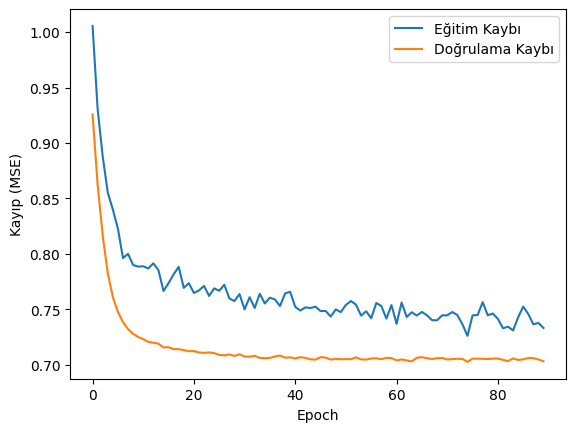

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7005 - mae: 0.6238 
Test Kayıp (MSE): 0.6783789992332458
Test Ortalama Mutlak Hata (MAE): 0.6223958730697632
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Orijinal Ölçekte MAE: 10372.34140625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Tahmini Fiyat: 39682.375


In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Veriyi Yükle ve Temizle
data = pd.read_csv('numericData.csv')  # CSV dosyanızı buraya göre ayarlayın
data = data.dropna()  # Eksik verileri sil
data = data[data['price'] < data['price'].quantile(0.99)]  # Aykırı değerleri çıkar

# Girdileri ve çıktıyı ayır
X = data[['living_room', 'area', 'age', 'floor']].values
y = data['price'].values

# 2. Veriyi Ölçeklendir
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 3. Modeli Oluştur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)  # Regresyon için tek çıkış
])

# 4. Modeli Derle
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# 5. Erken Durdurma
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# 6. Modeli Eğit
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# 7. Eğitim Sürecini Görselleştir
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (MSE)')
plt.legend()
plt.show()

# 8. Modeli Test Et
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Kayıp (MSE): {test_loss}")
print(f"Test Ortalama Mutlak Hata (MAE): {test_mae}")

# Orijinal ölçekte MAE hesapla
y_pred = model.predict(X_test)
y_pred_orijinal = scaler_y.inverse_transform(y_pred).flatten()
y_test_orijinal = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
mae_orijinal = np.mean(np.abs(y_test_orijinal - y_pred_orijinal))
print(f"Orijinal Ölçekte MAE: {mae_orijinal}")

# 9. Örnek Tahmin
yeni_veri = np.array([[3, 120, 10, 2]])  # Örnek veri
yeni_veri_scaled = scaler_X.transform(yeni_veri)
tahmin = model.predict(yeni_veri_scaled)
tahmin_orijinal = scaler_y.inverse_transform(tahmin)
print(f"Tahmini Fiyat: {tahmin_orijinal[0][0]}")

# 10. Modeli Kaydet
model.save('ev_fiyat_tahmin_modeli.h5')

In [12]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Kayıp (MSE): {test_loss}")
print(f"Test Ortalama Mutlak Hata (MAE): {test_mae}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7005 - mae: 0.6238 
Test Kayıp (MSE): 0.6783789992332458
Test Ortalama Mutlak Hata (MAE): 0.6223958730697632


In [15]:
y_pred = model.predict(X_test)
y_pred_orijinal = scaler_y.inverse_transform(y_pred).flatten()
y_test_orijinal = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
mae_orijinal = np.mean(np.abs(y_test_orijinal - y_pred_orijinal))
print(f"Orijinal Ölçekte MAE: {mae_orijinal}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Orijinal Ölçekte MAE: 10372.34140625


In [17]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Kayıp (MSE): {test_loss}")
print(f"Test Ortalama Mutlak Hata (MAE): {test_mae}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7005 - mae: 0.6238 
Test Kayıp (MSE): 0.6783789992332458
Test Ortalama Mutlak Hata (MAE): 0.6223958730697632


In [19]:
model.save('ev_fiyat_tahmin_modeli.h5')

In [20]:
import tensorflow as tf

# 1. Eğitilmiş modeli yükle
model = tf.keras.models.load_model('ev_fiyat_tahmin_modeli.h5')

# 2. TensorFlow Lite Converter'ı başlat
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 3. Varsayılan optimizasyonları uygula (isteğe bağlı)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# 4. Modeli .tflite formatına dönüştür
tflite_model = converter.convert()

# 5. .tflite dosyasını kaydet
with open('ev_fiyat_tahmin_modeli.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model başarıyla .tflite formatına dönüştürüldü: ev_fiyat_tahmin_modeli.tflite")

INFO:tensorflow:Assets written to: C:\Users\fatih\AppData\Local\Temp\tmplarlztld\assets


INFO:tensorflow:Assets written to: C:\Users\fatih\AppData\Local\Temp\tmplarlztld\assets


Saved artifact at 'C:\Users\fatih\AppData\Local\Temp\tmplarlztld'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1506446717200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1506446714384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1506513203824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1506513204000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1506513267072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1506513267776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1506513271296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1506509967200: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model başarıyla .tflite formatına dönüştürüldü: ev_fiyat_tahmin_modeli.tflite


c:\Users\fatih\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1885 - mae: 0.8385 - val_loss: 0.9927 - val_mae: 0.7752
Epoch 2/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0372 - mae: 0.7844 - val_loss: 0.8980 - val_mae: 0.7328
Epoch 3/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9859 - mae: 0.7553 - val_loss: 0.8377 - val_mae: 0.7055
Epoch 4/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9026 - mae: 0.7312 - val_loss: 0.8007 - val_mae: 0.6896
Epoch 5/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8641 - mae: 0.7096 - val_loss: 0.7786 - val_mae: 0.6777
Epoch 6/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8545 - mae: 0.7059 - val_loss: 0.7645 - val_mae: 0.6678
Epoch 7/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8410 - mae: 0.6986 - val_loss: 0.7536 - val_mae: 0.6627
Epoch 8/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8289 - mae: 0.6943 - val_loss: 0.7450 - val_mae: 0.6590
Epoch 9/300
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

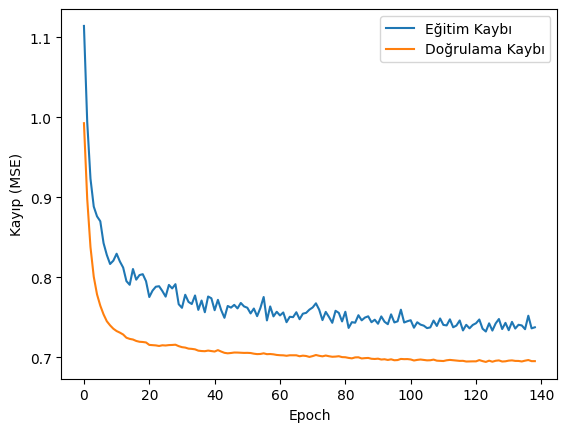

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6982 - mae: 0.6301 
Test Kayıp (MSE): 0.678149402141571
Test Ortalama Mutlak Hata (MAE): 0.6291952729225159
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Orijinal Ölçekte MAE: 10485.653806228374
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Tahmini Fiyat: 39165.84765625


In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle  # Scaler'ları kaydetmek için eklendi

# 1. Veriyi Yükle ve Temizle
data = pd.read_csv('numericData.csv')  # CSV dosyanızı buraya göre ayarlayın
data = data.dropna()  # Eksik verileri sil
data = data[data['price'] < data['price'].quantile(0.99)]  # Aykırı değerleri çıkar

# Girdileri ve çıktıyı ayır
X = data[['living_room', 'area', 'age', 'floor']].values
y = data['price'].values

# 2. Veriyi Ölçeklendir
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Scaler'ları kaydet
with open('scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)
with open('scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 3. Modeli Oluştur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)  # Regresyon için tek çıkış
])

# 4. Modeli Derle
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# 5. Erken Durdurma
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# 6. Modeli Eğit
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# 7. Eğitim Sürecini Görselleştir
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (MSE)')
plt.legend()
plt.show()

# 8. Modeli Test Et
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Kayıp (MSE): {test_loss}")
print(f"Test Ortalama Mutlak Hata (MAE): {test_mae}")

# Orijinal ölçekte MAE hesapla
y_pred = model.predict(X_test)
y_pred_orijinal = scaler_y.inverse_transform(y_pred).flatten()
y_test_orijinal = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
mae_orijinal = np.mean(np.abs(y_test_orijinal - y_pred_orijinal))
print(f"Orijinal Ölçekte MAE: {mae_orijinal}")

# 9. Örnek Tahmin
yeni_veri = np.array([[3, 120, 10, 2]])  # Örnek veri
yeni_veri_scaled = scaler_X.transform(yeni_veri)
tahmin = model.predict(yeni_veri_scaled)
tahmin_orijinal = scaler_y.inverse_transform(tahmin)
print(f"Tahmini Fiyat: {tahmin_orijinal[0][0]}")

# 10. Modeli Kaydet
model.save('ev_fiyat_tahmin_modelitest.h5')
